In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox

In [3]:
df = pd.read_csv(r'../../data/tidy/large/vehicle-locations-Oct2021toSep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
len(df.Vehicle.unique())

213

In [5]:
df_vehicle = pd.read_csv(r'../../data/tidy/vehicles-summary.csv', delimiter=',', skiprows=0)

In [6]:
len(df_vehicle['Equipment ID'].unique())

221

In [7]:
# Get the sets of unique values in each column
set_vehicle = set(df['Vehicle'])
set_equipment = set(df_vehicle['Equipment ID'])

# Find the uncommon values using the symmetric difference operation
uncommon_values = set_vehicle.symmetric_difference(set_equipment)

# Print the uncommon values
print("Uncommon values:", uncommon_values)

Uncommon values: {1559, 1632, 3201, 3202, 3203, 3204, 3205, 1406}


In [8]:
### Map powertrain
mydict = df_vehicle.groupby('Type')['Equipment ID'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df['Powertrain'] = df['Vehicle'].map(d)

In [9]:
### Map vehicle models
mydict = df_vehicle.groupby('Model')['Equipment ID'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df['VehicleModel'] = df['Vehicle'].map(d)

In [10]:
# Assign weights based on vehicle models
# weights for different models
thisdict = {
  "Gillig 30 ":25700,
  "Gillig 35":26440,
  "Gillig 40":27180,
  "NEW FLYER XD35": 26900 ,
  "NEW FLYER XD40": 28250 ,
  "NEW FLYER XDE40": 28250 ,
  "NEW FLYER XDE60 (ARTIC)": 42250 ,
  "NEW FLYER XE35": 26900 ,
  "NEW FLYER XE40": 32770 ,
  "PROTERRA CATALYST BE-40": 27370 ,
}
df['VehiclWeight(lb)'] = df['VehicleModel'].map(thisdict)

In [66]:
# save the final data frame with mapped model and weights
#df.to_csv(r'../../results/trajectories-mapped-powertrain-weight-oct2021-sep2022.csv')

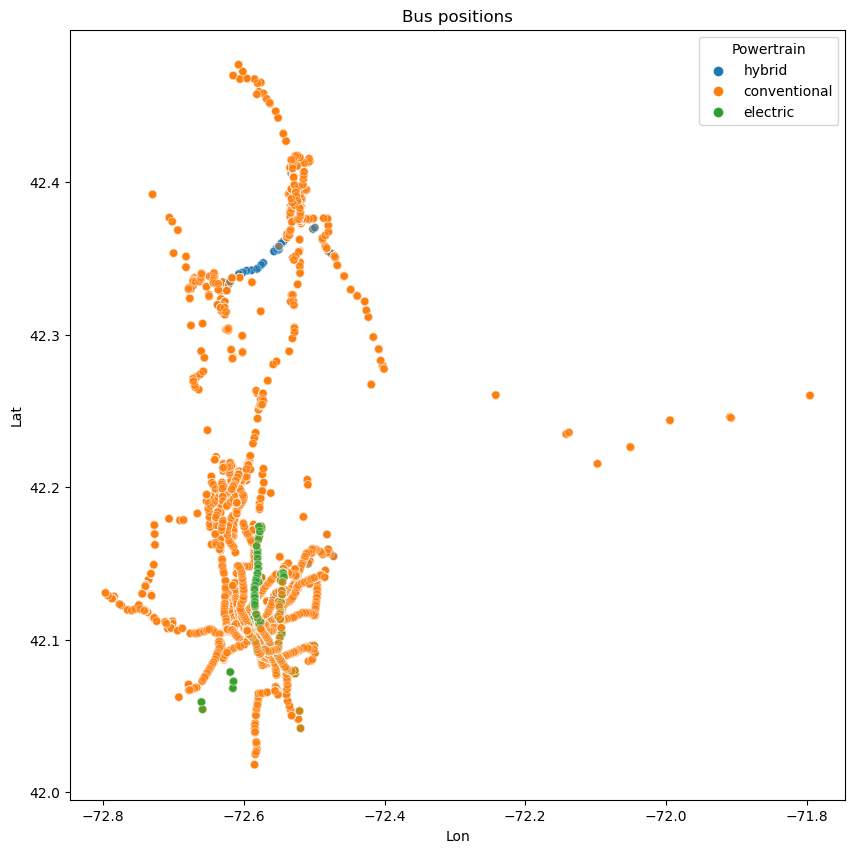

In [11]:
#Plot the distribution of bus positions (longitude and latitude) using a scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Lon', y='Lat', hue='Powertrain', alpha=0.5)
plt.title('Bus positions')
plt.show()

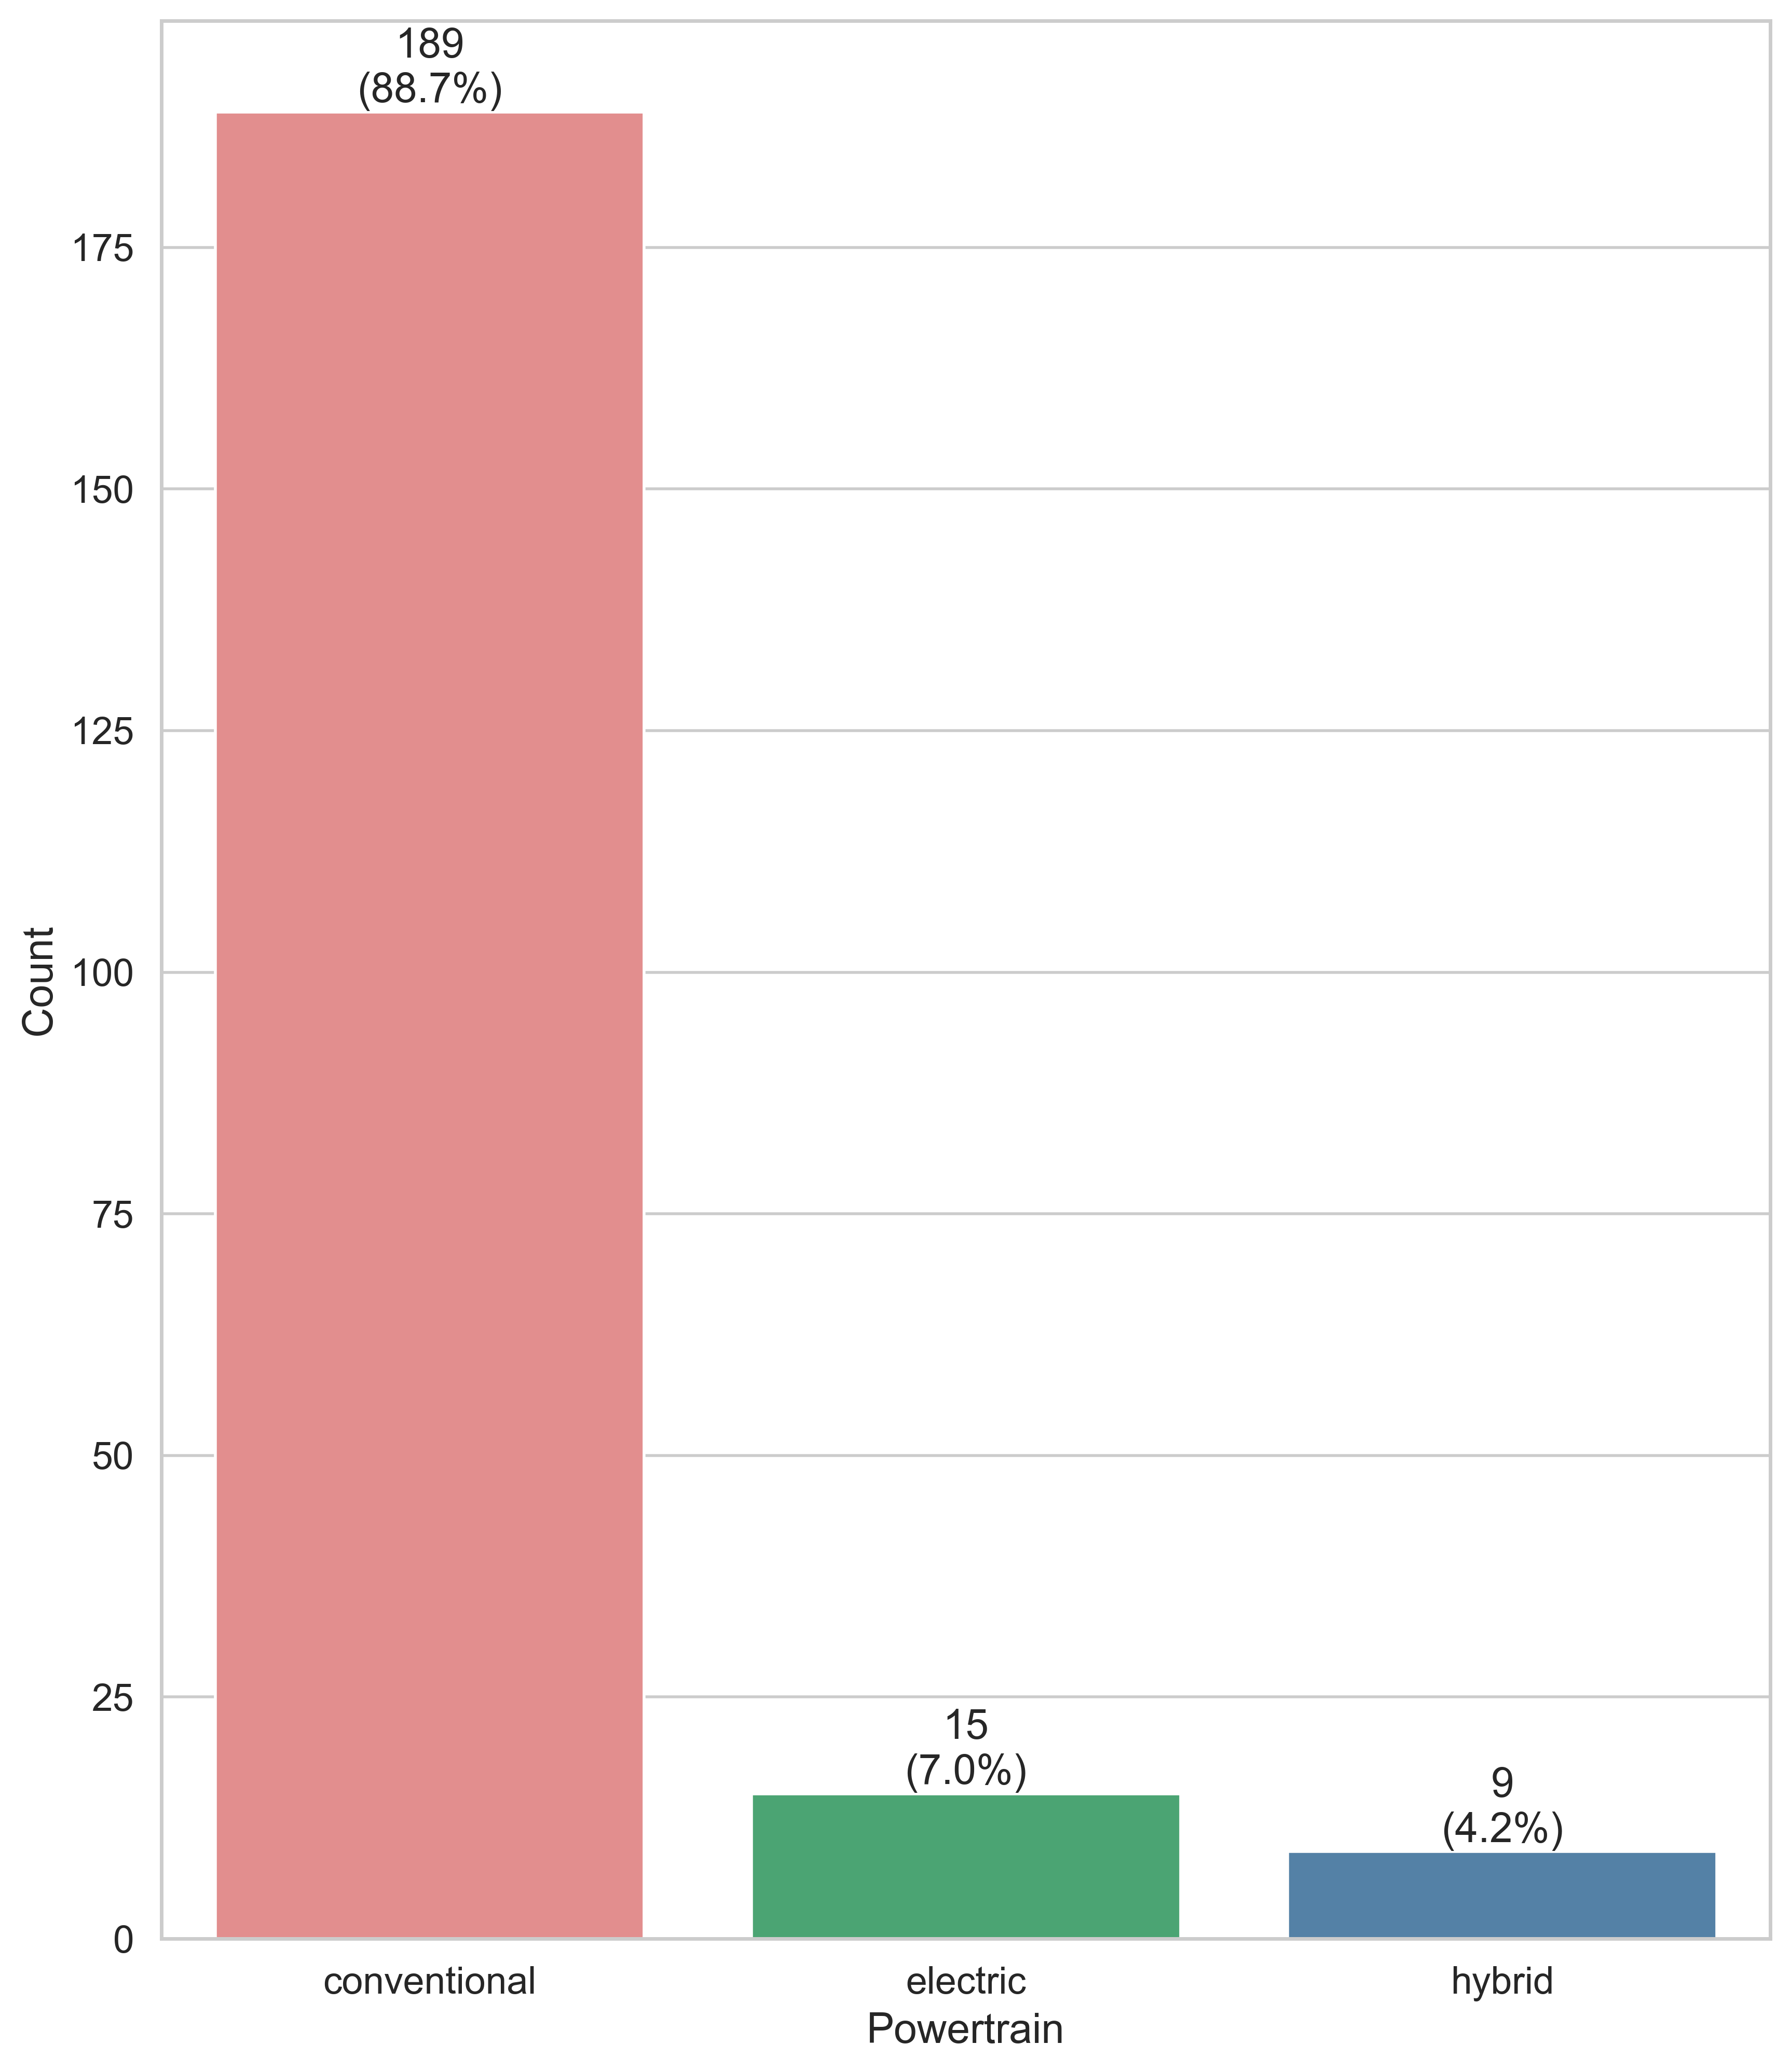

In [52]:
#plot vehicles

# set style and font size
sns.set(style='whitegrid', font_scale=1.2)

# group by unique vehicles
df_unique = df.groupby('Vehicle').first().reset_index()

# count occurrences of each powertrain type
powertrain_counts = df_unique['Powertrain'].value_counts()

# calculate percentage of each powertrain type
powertrain_percentages = powertrain_counts / powertrain_counts.sum() * 100

# set the color palette for each powertrain type
colors = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

palette = [colors[p] for p in powertrain_counts.index]

# plot the distribution
plt.figure(figsize=(10, 12), dpi=400)
ax = sns.barplot(x=powertrain_counts.index, y=powertrain_counts, palette=palette)
plt.xlabel('Powertrain')
plt.ylabel('Count')

# add count and percentage labels to the bars
for i, v in enumerate(powertrain_counts):
    ax.text(i, v+1, f'{v}\n({powertrain_percentages[i]:.1f}%)', ha='center')
# save    
plt.savefig(r'../../figures/powertrain-oct2021-sep2022.png', dpi=600, bbox_inches='tight')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

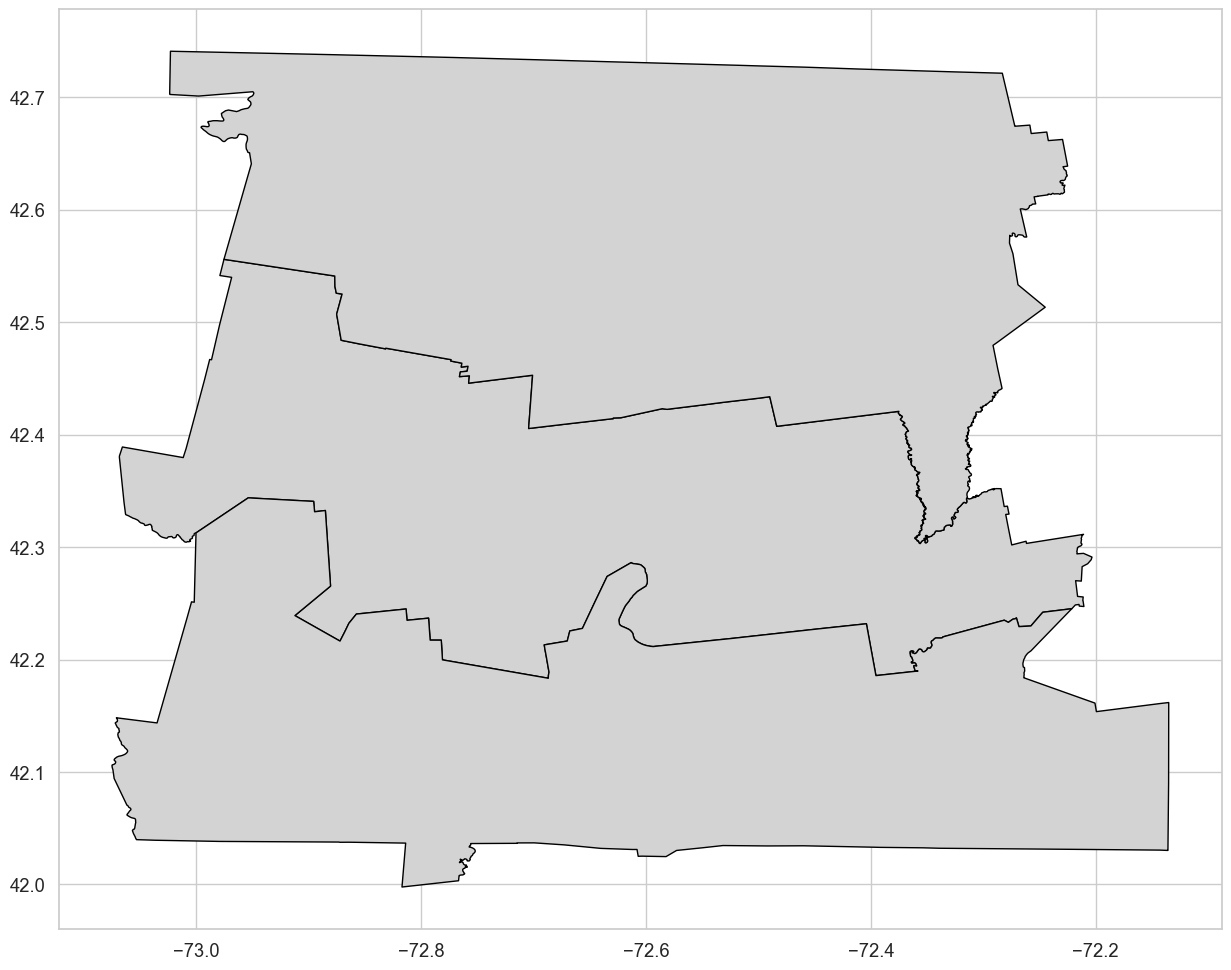

In [53]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Franklin County, Massachusetts, USA']

area = ox.geocode_to_gdf(pioneer_valley)

# Assuming you have a pandas.DataFrame called df that contains columns 'Lon', 'Lat', and 'Vehicle'
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 15))
area.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, column='Vehicle', markersize=10, legend=True, palette=palette , alpha=0.5)
plt.title('Spatial plot of bus locations')
plt.show()


In [54]:
df_outlier=df.loc[df['Lon']>-72.3]

In [94]:
df_outlier.columns

Index(['Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date', 'Powertrain', 'VehicleModel', 'VehiclWeight(lb)', 'geometry'],
      dtype='object')

In [95]:
df_outlier['Stop'].unique()

array([ 331,    0, 7902, 7904, 7906, 7908, 7910, 7912, 7911, 7909, 7907,
       7905, 7903,  332], dtype=int64)

In [96]:
df_outlier['StopName'].unique()

array(['Ware Town Hall', '(X) Undefined', 'West Brookfield',
       'Brookfield (E)', 'East Brookfield', 'Spencer (E)',
       'Leicester (E)', 'Union Station G', 'Leicester (W)', 'Spencer (W)',
       'Brookfield (W)'], dtype=object)

In [98]:
df.loc[df['Stop']==0]

,Unnamed: 0,ServiceDateTime,DateKey,CalendarDate,Year,Month,OpKey,Operator,RtKey,RtKey2,...,Bike,Daytype,Hour,Minute,Second,Date,Powertrain,VehicleModel,VehiclWeight(lb),geometry
24,24,2022-04-01 06:00:00,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,2,Weekday,6,0,0,2022-04-01,conventional,NEW FLYER XD40,28250,POINT (-72.50724 42.37582)
25,25,2022-04-01 06:02:00,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,1,Weekday,6,2,0,2022-04-01,conventional,Gillig 40,27180,POINT (-72.50724 42.37582)
26,26,2022-04-01 08:00:00,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,1,Weekday,8,0,0,2022-04-01,conventional,NEW FLYER XD40,28250,POINT (-72.50724 42.37582)
373,373,2022-04-01 08:27:00,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3514,3381,...,1,Weekday,8,27,0,2022-04-01,conventional,NEW FLYER XD40,28250,POINT (-72.50724 42.37582)
769,769,2022-04-01 07:58:00,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3515,1001,...,1,Weekday,7,58,0,2022-04-01,conventional,NEW FLYER XD40,28250,POINT (-72.50724 42.37582)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15619813,15619813,2022-09-30 19:41:24,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4022,1734,...,0,0,19,41,24,2022-09-30,conventional,Gillig 40,27180,POINT (-72.50724 42.37582)
15620242,15620242,2022-09-30 07:37:56,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4023,1741,...,0,0,7,37,56,2022-09-30,conventional,NEW FLYER XD40,28250,POINT (-72.50724 42.37582)
15620313,15620313,2022-09-30 12:25:58,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4023,1741,...,0,0,12,25,58,2022-09-30,conventional,Gillig 40,27180,POINT (-72.50724 42.37582)
15620386,15620386,2022-09-30 14:32:16,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4023,1741,...,0,0,14,32,16,2022-09-30,conventional,Gillig 40,27180,POINT (-72.50724 42.37582)


In [99]:
df

,Unnamed: 0,ServiceDateTime,DateKey,CalendarDate,Year,Month,OpKey,Operator,RtKey,RtKey2,...,Bike,Daytype,Hour,Minute,Second,Date,Powertrain,VehicleModel,VehiclWeight(lb),geometry
0,0,2022-04-01 02:54:19,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,0,Weekday,2,54,19,2022-04-01,hybrid,NEW FLYER XDE60 (ARTIC),42250,POINT (-72.63755 42.31962)
1,1,2022-04-01 05:48:20,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,0,Weekday,5,48,20,2022-04-01,conventional,NEW FLYER XD40,28250,POINT (-72.62941 42.33355)
2,2,2022-04-01 06:04:45,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,0,Weekday,6,4,45,2022-04-01,conventional,NEW FLYER XD40,28250,POINT (-72.63755 42.31962)
3,3,2022-04-01 06:01:31,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,0,Weekday,6,1,31,2022-04-01,conventional,Gillig 40,27180,POINT (-72.62941 42.33355)
4,4,2022-04-01 06:48:01,8760,2022-04-01 00:00:00.000,2022,4,1,VATCo,3410,1007,...,0,Weekday,6,48,1,2022-04-01,conventional,Gillig 40,27180,POINT (-72.62941 42.33355)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15621724,15621724,2022-09-30 21:13:03,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4025,1745,...,0,0,21,13,3,2022-09-30,conventional,Gillig 40,27180,POINT (-72.52530 42.39099)
15621725,15621725,2022-09-30 21:14:14,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4025,1745,...,0,0,21,14,14,2022-09-30,conventional,Gillig 40,27180,POINT (-72.52391 42.38783)
15621726,15621726,2022-09-30 21:16:09,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4025,1745,...,0,0,21,16,9,2022-09-30,conventional,Gillig 40,27180,POINT (-72.52828 42.38496)
15621727,15621727,2022-09-30 21:16:46,8942,2022-09-30 00:00:00.000,2022,9,3,UMASS,4025,1745,...,0,0,21,16,46,2022-09-30,conventional,Gillig 40,27180,POINT (-72.53120 42.38655)


In [68]:
#df['Lon'].loc[df['Stop']==0].unique()

In [69]:
df['StopName'].loc[df['Stop']==0].unique()

array(['(X) Undefined'], dtype=object)

In [11]:
# Filter rows with empty 'Lat' or 'Lon'
filtered_df = df[df['Lat'].isna() | df['Lon'].isna()]

# Print the filtered dataframe
filtered_df['Stop'].unique()

array([0], dtype=int64)

In [12]:
# check weaather lat and lon are same for each stops
Lat=df['Lat'].loc[df['Stop']==13101].unique()
Lat

array([42.3633  , 42.363303, 42.363294])

In [13]:
grouped = df.groupby('Stop')[['Lat', 'Lon']].agg(lambda x: x.mode().iloc[0])
grouped.reset_index(level=0, inplace=True)
grouped

,Stop,Lat,Lon
0,0,42.375823,-72.507237
1,1,42.477044,-72.607453
2,2,42.472547,-72.601401
3,4,42.468016,-72.595440
4,6,42.465387,-72.575866
...,...,...,...
1890,11144,42.208121,-72.606502
1891,11701,42.371656,-72.480013
1892,12601,42.367474,-72.479757
1893,12901,42.365067,-72.484289


In [14]:
# Create dictionaries to map 'Stop' to 'Lat' and 'Lon' values
mydict1 = grouped.set_index('Stop')['Lat'].to_dict()
mydict2 = grouped.set_index('Stop')['Lon'].to_dict()

# Map 'Lat' and 'Lon' values in the 'df' DataFrame using the dictionaries
df['Lat'] = df['Stop'].map(mydict1)
df['Lon'] = df['Stop'].map(mydict2)

In [15]:
# check weaather lat and lon are same for each stops
Lat=df['Lat'].loc[df['Stop']==13101].unique()
Lat

array([42.363303])

In [16]:
grouped

,Stop,Lat,Lon
0,0,42.375823,-72.507237
1,1,42.477044,-72.607453
2,2,42.472547,-72.601401
3,4,42.468016,-72.595440
4,6,42.465387,-72.575866
...,...,...,...
1890,11144,42.208121,-72.606502
1891,11701,42.371656,-72.480013
1892,12601,42.367474,-72.479757
1893,12901,42.365067,-72.484289


In [110]:
# save the final data frame with mapped model and weights and consistent Lat and Lon
df.to_csv(r'../../data/tidy/large/vehicle-locations-mapped-powertrain-weight-consistent-lat-long-oct2021-sep2022.csv')

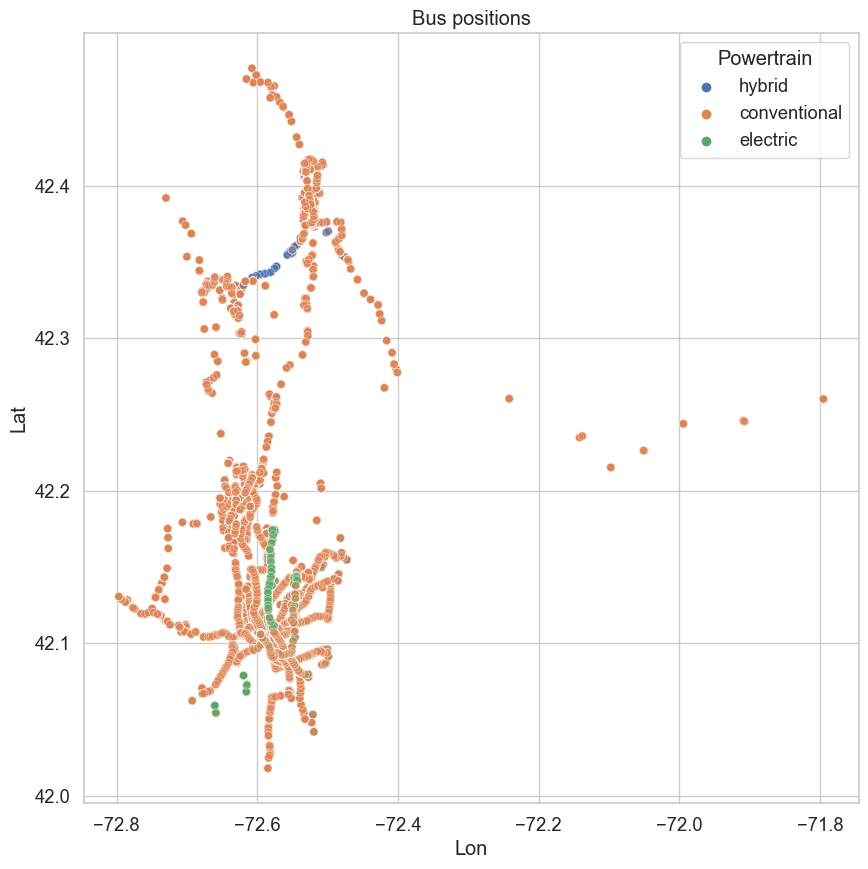

In [77]:
#Plot the distribution of bus positions (longitude and latitude) using a scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Lon', y='Lat', hue='Powertrain', alpha=0.5)
plt.title('Bus positions')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

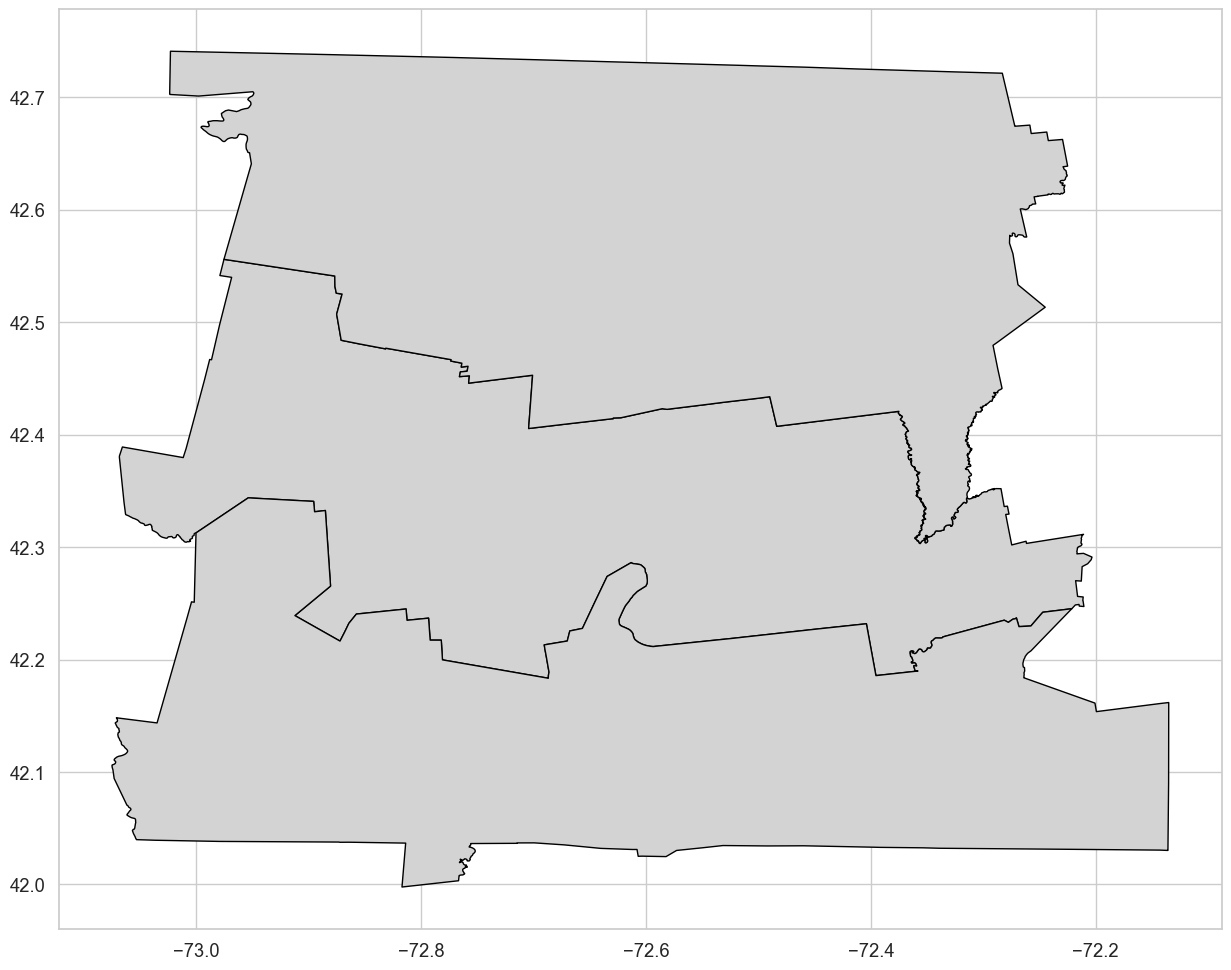

In [78]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Franklin County, Massachusetts, USA']

area = ox.geocode_to_gdf(pioneer_valley)

# Assuming you have a pandas.DataFrame called df that contains columns 'Lon', 'Lat', and 'Vehicle'
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 15))
area.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, column='Vehicle', markersize=10, legend=True, palette=palette , alpha=0.5)
plt.title('Spatial plot of bus locations')
plt.show()

In [17]:
df['Stop'].loc[(df['Lon']>-72.2) & (df['Lon']<-72.1)].unique()

array([7902, 7903], dtype=int64)

In [18]:
df['StopName'].loc[(df['Lon']>-72.2) & (df['Lon']<-72.1)].unique()

array(['West Brookfield'], dtype=object)

In [19]:
df['StopName'].loc[df['Stop']==7902].unique()

array(['West Brookfield'], dtype=object)

In [20]:
df['StopName'].loc[df['Stop']==7903].unique()

array(['West Brookfield'], dtype=object)

In [21]:
df.columns

Index(['Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date', 'Powertrain', 'VehicleModel', 'VehiclWeight(lb)'],
      dtype='object')

In [ ]:
# Plot the distribution of bus positions (longitude and latitude) using a scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Lon', y='Lat', hue='Powertrain', alpha=0.5)

# Filter data points with Lon < -72.3
filtered_df = df[df['Lon'] < -72.3]

# Annotate the filtered data points with StopName
for i, row in filtered_df.iterrows():
    plt.annotate(row['StopName'], (row['Lon'], row['Lat']), fontsize=8, xytext=(2, 2), textcoords='offset points')

plt.title('Bus positions')
plt.show()


In [ ]:
df['Vehicle'].loc[df['Powertrain']=='electric'].unique()

In [120]:
df['Vehicle'].loc[df['Powertrain']=='hybrid'].unique()

array([7901, 1801, 1804, 1803, 1805, 3402, 3401, 1802, 7902], dtype=int64)

In [22]:
## Compute closest distance in mile between each pair of stops

# Extract unique stops
unique_stops = df.drop_duplicates(subset='Stop')[['Stop', 'Lat', 'Lon']]

# Function to calculate the haversine distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8  # Earth's radius in miles
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate distances between each pair of unique stops
distances = []
for i, row1 in unique_stops.iterrows():
    for j, row2 in unique_stops.iterrows():
        if row1['Stop'] != row2['Stop']:
            distance = haversine(row1['Lat'], row1['Lon'], row2['Lat'], row2['Lon'])
            distances.append((row1['Stop'], row2['Stop'], distance))

# Convert distances to a DataFrame
distances_df = pd.DataFrame(distances, columns=['Stop_1', 'Stop_2', 'distance'])

In [23]:
distances_df.dropna(subset=['distance'], inplace=True)
distances_df 

,Stop_1,Stop_2,distance
0,251.0,9009.0,1.048420
1,251.0,267.0,0.665425
2,251.0,261.0,0.265376
3,251.0,0.0,7.704682
4,251.0,244.0,0.553592
...,...,...,...
3589125,8005.0,1927.0,29.389736
3589126,8005.0,6140.0,7.680727
3589127,8005.0,6141.0,7.605113
3589128,8005.0,6255.0,10.666270


In [24]:
# Find the smallest distance for each stop
min_distances = distances_df.loc[distances_df.groupby('Stop_1')['distance'].idxmin()]

# Display the results
print(min_distances)

          Stop_1  Stop_2  distance
9271         0.0   108.0  0.000000
3369309      1.0     2.0  0.437800
3367417      2.0  9993.0  0.396765
3365520      4.0     2.0  0.436243
3265255      6.0  8005.0  0.010924
...          ...     ...       ...
975150   11144.0  9086.0  0.048831
3357907  11701.0   117.0  0.004405
3356014  12601.0   126.0  0.007184
3354121  12901.0   129.0  0.003464
3352228  13101.0   131.0  0.011040

[1895 rows x 3 columns]


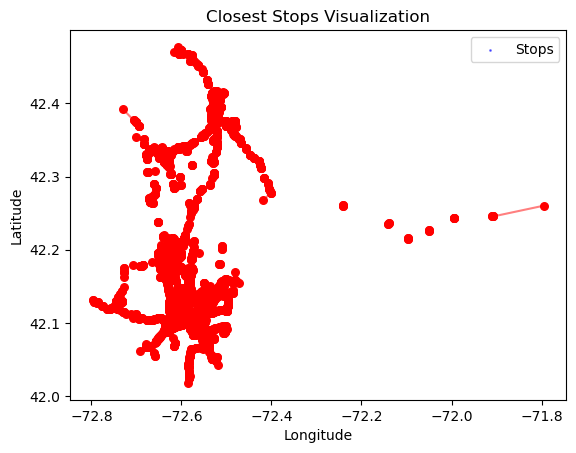

In [25]:
# Create a scatter plot of all stops
plt.scatter(unique_stops['Lon'], unique_stops['Lat'], s=1, c='blue', label='Stops', alpha=0.5)

# Highlight the closest stops pairs
for i, row in min_distances.iterrows():
    stop1 = unique_stops.loc[unique_stops['Stop'] == row['Stop_1']]
    stop2 = unique_stops.loc[unique_stops['Stop'] == row['Stop_2']]
    plt.plot([stop1['Lon'].values[0], stop2['Lon'].values[0]], [stop1['Lat'].values[0], stop2['Lat'].values[0]], 'r', alpha=0.5)
    plt.scatter([stop1['Lon'].values[0], stop2['Lon'].values[0]], [stop1['Lat'].values[0], stop2['Lat'].values[0]], c='red', s=30)

# Set title, legend, and labels
plt.title('Closest Stops Visualization')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


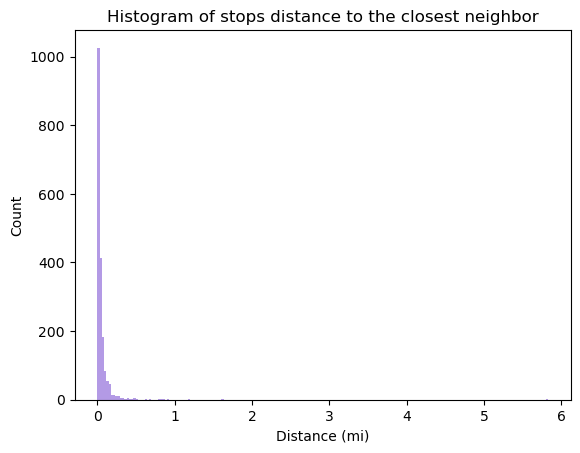

In [26]:
# Create a histogram of distances
plt.hist(min_distances['distance'], bins=200, color='mediumpurple', alpha=0.7)
plt.title('Histogram of stops distance to the closest neighbor')
plt.xlabel('Distance (mi)')
plt.ylabel('Count')

# Show the plot
plt.show()

In [24]:
max(min_distances['distance'])

5.829367053276529

In [22]:
min(min_distances['distance'])

0.0

In [30]:
min_distances['distance'].mean()

0.05493920913840497

In [31]:
min_distances['distance'].median()

0.02482772391053362

In [32]:
min_distances.loc[min_distances['distance']==0]

,Stop_1,Stop_2,distance
1214358,1358.0,6010.0,0.0
576416,6010.0,1358.0,0.0


In [38]:
df['StopName'].loc[df['Stop']==6010]

4636        (X) State / Walnut
4687        (X) State / Walnut
4818        (X) State / Walnut
4819        (X) State / Walnut
4833        (X) State / Walnut
                   ...        
15572236        State / Walnut
15572610        State / Walnut
15572611        State / Walnut
15572620        State / Walnut
15572983        State / Walnut
Name: StopName, Length: 964, dtype: object

In [34]:
df.columns

Index(['Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date'],
      dtype='object')